### Importing libraries

In [12]:
import librosa 
import soundfile as sf
import numpy as np
import os
import statistics
import pandas as pd
import matplotlib.pyplot as plt

### Extracting features MFCC, Chroma, Mel Spectrogram, Tonnetz & Contrast Spectrogram and storing them in a horizontal numpy stack

In [2]:
def extract_feature(voice, sr):
    stft=np.abs(librosa.stft(voice))
    result = np.array([])

    mfccs=np.mean(librosa.feature.mfcc(y=voice, sr=sr, n_mfcc=40).T, axis=0)
    result=np.hstack((result, mfccs))

    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
    result=np.hstack((result, chroma))

    mel=np.mean(librosa.feature.melspectrogram(voice, sr=sr).T,axis=0)
    result=np.hstack((result, mel))
    
    tonnetz = np.mean(librosa.feature.tonnetz(voice, sr).T,axis=0)
    result=np.hstack((result, tonnetz))
    
    contrast = np.mean(librosa.feature.spectral_contrast(voice, sr).T,axis=0)
    result=np.hstack((result, contrast))

    return result

### Loading the Train and Test Data Set provided from its respective folders and assigning its Labels side by side

In [3]:
def load_data(PATH, x, y):
    for file in os.listdir(PATH):
    
        PATH_s = PATH + file
        
        if (PATH == "C:\\Users\\Lenovo\\SERDataset\\Train\\Happy\\"):
            emotion = "Happy"
        elif (PATH == "C:\\Users\\Lenovo\\SERDataset\\Train\\Sad\\"):
            emotion = "Sad"
        elif (PATH == "C:\\Users\\Lenovo\\SERDataset\\Train\\Angry\\"):
            emotion = "Angry"
        elif (PATH == "C:\\Users\\Lenovo\\SERDataset\\Train\\Neutral\\"):
            emotion = "Neutral"
        elif (PATH == "C:\\Users\\Lenovo\\SERDataset\\Test\\Angry\\"):
            emotion = "Angry"
        elif(PATH == "C:\\Users\\Lenovo\\SERDataset\\Test\\Sad\\"):
            emotion = "Sad"
        elif(PATH == "C:\\Users\\Lenovo\\SERDataset\\Test\\Happy\\"):
            emotion = "Happy"
        elif (PATH == "C:\\Users\\Lenovo\\SERDataset\\Test\\Neutral\\"):
            emotion = "Neutral"
        else:
            emotion = "-"

        voice, sr = sf.read(PATH_s, dtype='float32')
    
        feature = extract_feature(voice, sr) 
        
        x.append(feature)
        y.append(emotion)

### Saving the features and Labels for the Train data using the above function

In [25]:
PATH_Happy = "C:\\Users\\Lenovo\\SERDataset\\Train\\Happy\\"
PATH_Sad = "C:\\Users\\Lenovo\\SERDataset\\Train\\Sad\\"
PATH_Angry = "C:\\Users\\Lenovo\\SERDataset\\Train\\Angry\\"
PATH_Neutral = "C:\\Users\\Lenovo\\SERDataset\\Train\\Neutral\\"

x_train_happy = []
y_train_happy = []
x_train_angry = []
y_train_angry = []
x_train_sad = []
y_train_sad = []
x_train_neutral = []
y_train_neutral = []

load_data(PATH_Happy, x_train_happy, y_train_happy)
load_data(PATH_Angry, x_train_angry, y_train_angry)
load_data(PATH_Sad, x_train_sad, y_train_sad)
load_data(PATH_Neutral, x_train_neutral, y_train_neutral)

### Saving the features and Labels for the Test data using the above function

In [24]:
PATH_Happy_Test = "C:\\Users\\Lenovo\\SERDataset\\Test\\Happy\\"
PATH_Sad_Test = "C:\\Users\\Lenovo\\SERDataset\\Test\\Sad\\"
PATH_Angry_Test = "C:\\Users\\Lenovo\\SERDataset\\Test\\Angry\\"
PATH_Neutral_Test = "C:\\Users\\Lenovo\\SERDataset\\Test\\Neutral\\"

x_test_happy = []
y_test_happy = []
x_test_angry = []
y_test_angry = []
x_test_sad = []
y_test_sad = []
x_test_neutral = []
y_test_neutral = []

load_data(PATH_Happy_Test, x_test_happy, y_test_happy)
load_data(PATH_Angry_Test, x_test_angry, y_test_angry)
load_data(PATH_Sad_Test, x_test_sad, y_test_sad)
load_data(PATH_Neutral_Test, x_test_neutral, y_test_neutral)

### Concatening all the lists of traning and testing with their sub lists

In [54]:
x_train = x_train_happy + x_train_angry + x_train_sad + x_train_neutral
y_train = y_train_happy + y_train_sad + y_train_angry + y_train_neutral 

x_test = x_test_happy + x_test_angry + x_test_sad + x_test_neutral
y_test = y_test_happy + y_test_sad + y_test_angry + y_test_neutral 

# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)

### Collecting the total Train Data in a Pandas Data Frame

In [56]:
x_tr = np.array(x_train)
# print(x_tr.shape)

row_len = int(x_tr.shape[0])
# print(row_len)
col_len = int(x_tr.shape[1])
# print(col_len)
half = int (col_len/2)

left=[]
right=[]

for i in range(row_len):
    r1=[]
    r2=[]
    
    for j in range(len(x_tr[1])):
        if (j<half):
            r1.append(x_tr[i,j])
        else:
            r2.append(x_tr[i,j])
            
    left.append(statistics.mean(r1))
    right.append(statistics.mean(r2))

# print(left)
# print(right)

df = pd.DataFrame(list(zip(left, right, y_train)), columns=['Left', 'Right', 'Labels'])

# print(df)

### Plotting the above Data Frame using matplotlib.pyplot

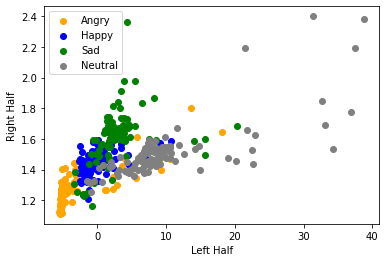

In [13]:
plt.scatter(df['Left'][df.Labels == 'Angry'], df['Right'][df.Labels == 'Angry'], color='orange', label='Angry')
plt.scatter(df['Left'][df.Labels == 'Happy'], df['Right'][df.Labels == 'Happy'], color='blue', label='Happy')
plt.scatter(df['Left'][df.Labels == 'Sad'], df['Right'][df.Labels == 'Sad'], color='green', label='Sad')
plt.scatter(df['Left'][df.Labels == 'Neutral'], df['Right'][df.Labels == 'Neutral'], color='grey', label='Neutral')

plt.xlabel('Left Half')
plt.ylabel('Right Half')

plt.legend()

plt.show()

### Assigning labels in integer form to the y_train & y_test list before applying ML

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [49]:
y_train_ML = le.fit(y_train)
y_train_ML = le.transform(y_train)

# print(y_train_ML)

In [50]:
y_test_ML = le.fit(y_test)
y_test_ML = le.transform(y_test)

# print(y_test_ML)

### Training the Machine Learning model using Support Vector Classifier 

In [18]:
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel='linear', gamma=0.001, C=1)
model.fit(x_train, y_train_ML)

SVC(C=1, gamma=0.001, kernel='linear')

### Obtaining the predicted labels of our Test Data

In [51]:
pred = model.predict(x_test)

# print(pred)

### Calculating Accuracy of the model using Training Labels and Predicted Labels

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_ML, pred)

0.9833333333333333

### Predicting the Label for the file 'SM25_F34_S084.wav' using the above model

In [42]:
x_test_single = []
y_test_single = []

voice, sr = sf.read('SM25_F34_S084.wav', dtype='float32')
y_test_single.append('Sad')

### Assigning 0 to the Label 'Sad' by performing transformation on it.

In [52]:
y_test_ML_single = le.fit(y_test_single)
y_test_ML_single = le.transform(y_test_single)

# print(y_test_ML_single)

### Extracting the audio file's features and storing them in a x_test_single

In [53]:
feature = extract_feature(voice, sr) 
feature

x_test_single.append(feature)

# print(x_test_single)
# print(y_test_ML_single)

### Predicting the Label for the given Test file from the 'Sad' directory

In [46]:
pred1 = model.predict(x_test_single)

### The model has predicted 0, which was earlier assigned to it's label (Sad)

In [47]:
pred1

array([0])